In [105]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [106]:
dataset = pd.read_csv("climatedata.csv")
dataset.fillna(0)

,Country Name,Country Code,Series Name,Series Code,1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],...,2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,68.29,89.50,71.5,97.7,97.70,96.62,97.7,97.7,0.0,0.0
1,Afghanistan,AFG,Account (% age 15+),account.t.d,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,9.96,0.0,0.0,14.89,0.00,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,"Account, income, poorest 40% (% ages 15+)",account.t.d.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,6.07,0.0,0.0,13.80,0.00,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,Additional people below $4 as % of total popul...,CC.AVPB.TPOP.AG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,Annual coal production (Mt per year) - Operating,CC.COAL.PROD.OP,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3521,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3522,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3523,Data from database: Country Climate and Develo...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [107]:
#FINDING CLUSTERS USING K MEANS CLUSTERING
columns = []
for i in dataset.columns:
    columns.append(i)
print(columns)

['Country Name', 'Country Code', 'Series Name', 'Series Code', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]']


In [108]:
#specyfing the input file
dataset = dataset.dropna()
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
X = dataset[['1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', 
            '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', 
            '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', 
            '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', 
            '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]','2016 [YR2016]', '2017 [YR2017]', 
            '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]

In [109]:
#specyfing the output file
Y = dataset['2022 [YR2022]']

In [110]:

X = np.array(X)

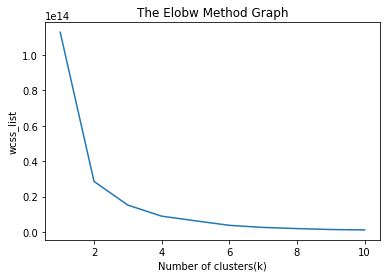

In [111]:
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

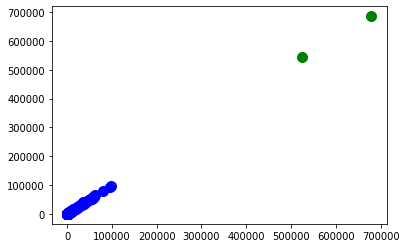

In [112]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

In [113]:
#creating a simple 
# Import curve fitting package from scipy
from scipy.optimize import curve_fit


In [114]:
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)

In [121]:
#Estimating R square
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

In [126]:
#Showing R square
adjR(dataset['1994 [YR1994]'],dataset['2022 [YR2022]'], 1)
adjR(dataset['1994 [YR1994]'],dataset['2022 [YR2022]'], 2)
adjR(dataset['1994 [YR1994]'], dataset['2022 [YR2022]'], 3)
adjR(dataset['1994 [YR1994]'], dataset['2022 [YR2022]'], 4)
adjR(dataset['1994 [YR1994]'], dataset['2022 [YR2022]'], 5)

{'r_squared': nan}

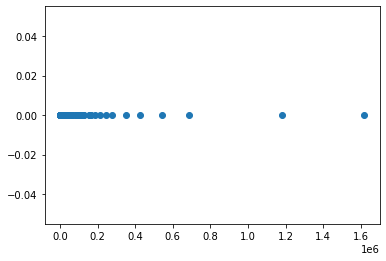

In [129]:
#fit fourth-degree polynomial
model4 = np.poly1d(np.polyfit(dataset['1994 [YR1994]'],dataset['2022 [YR2022]'], 4))

#define scatterplot
polyline = np.linspace(1, 15, 50)
plt.scatter(dataset['1994 [YR1994]'],dataset['2022 [YR2022]'] )

#add fitted polynomial curve to scatterplot
plt.plot(polyline, model4(polyline), '--', color='red')
plt.show()

In [116]:
#Find warnings
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper 